# <center><font color = '#DF9166' size = 20 center> **Data Preprocessing and Exploration**</font></center>

## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Data Exploration**](#data_exploration)


## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd

from glob import glob
from IPython.display import display

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

In [3]:
sys.path.append(os.path.abspath(os.pardir))
from src.preprocess import extract_messages, clean_dataframe, save_cleaned_data
from src.visualize import (
    generate_hist_box_plots,
    plot_gantt_chart,
    plot_channel_distribution,
    plot_word_cloud,
)

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [4]:
DATA_PATHS = glob("../data/raw/scraped_data/*/result.json")
DATA_PATHS

['../data/raw/scraped_data/EAHCI/result.json',
 '../data/raw/scraped_data/yetenaweg/result.json',
 '../data/raw/scraped_data/lobelia4cosmetics/result.json',
 '../data/raw/scraped_data/CheMed/result.json',
 '../data/raw/scraped_data/DoctorsET/result.json']

In [5]:
df = extract_messages(DATA_PATHS)
df.sample(5)

2025-02-02 20:56:40,580 - INFO - ✅ Loaded JSON file: ../data/raw/scraped_data/EAHCI/result.json
2025-02-02 20:56:40,707 - INFO - ✅ Extracted 2247 messages from EAHCI
2025-02-02 20:56:40,777 - INFO - ✅ Loaded JSON file: ../data/raw/scraped_data/yetenaweg/result.json
2025-02-02 20:56:40,860 - INFO - ✅ Extracted 1144 messages from yetenaweg
2025-02-02 20:56:41,001 - INFO - ✅ Loaded JSON file: ../data/raw/scraped_data/lobelia4cosmetics/result.json
2025-02-02 20:56:41,152 - INFO - ✅ Extracted 2224 messages from lobelia4cosmetics
2025-02-02 20:56:41,167 - INFO - ✅ Loaded JSON file: ../data/raw/scraped_data/CheMed/result.json
2025-02-02 20:56:41,171 - INFO - ✅ Extracted 76 messages from CheMed
2025-02-02 20:56:41,204 - INFO - ✅ Loaded JSON file: ../data/raw/scraped_data/DoctorsET/result.json
2025-02-02 20:56:41,256 - INFO - ✅ Extracted 803 messages from DoctorsET
2025-02-02 20:56:41,336 - INFO - ✅ Successfully created DataFrame with 6494 rows and 9 columns


,channel_name,channel_address,channel_id,message_id,date,message,media_path,width,height
1453,ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEALTH CONSULTANCY CENTER,EAHCI,1432982009,1706,2023-11-15 10:35:54,#CPD\n✔️#Title_Antimicrobial Drug Resistance\n✔️ ህዳር 8 ጀምሮ ይሰጣል።\n#ለጤና_ባለሞያዎች_Oromia_Amhara_AA_Harari_SNNPR_Sidama_ላላችሁ።\n--------------------------------------------\n📳0965410000\n📳0942404444\n📳0965412222 \n📳0941404444 \n📳0462124400\n 🚩Organized By-(Ethio-American CPD center & Health Consultancy.)\n🏃We Are Committed To Excellence In Medical Trainings ❗\n-join our telegram channel \nT.me/eahci,../data/raw/scraped_data/EAHCI/photos/photo_832@23-09-2023_09-47-07.jpg,500.0,409.0
4267,Lobelia pharmacy and cosmetics,lobelia4cosmetics,1666492664,13887,2024-12-05 09:02:22,APPLE CIDER VENEGAR \nPrice 2800 birr \nTelegram https://t.me/lobelia4cosmetics\nMsg👉 Lobelia pharmacy and cosmetics \n☎️ call 0911562031/0911587703\nAdress:- Infront of Bole Medhanialem high school \nOpen Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት\n🏍🏍🏍 የትራንስፖርት አማራጭ ከ70 - 200 ብር\nFor delivery option fees are from 70 birr - 200 birr,../data/raw/scraped_data/lobelia4cosmetics/photos/photo_415@18-11-2024_11-00-53.jpg,500.0,500.0
5747,Doctors Ethiopia,DoctorsET,1102021238,62,2019-10-17 09:41:18,ዛሬ ዶክተርስ ኢትዮጵያ በ ኤል ቲቪ \nዛሬ ማታ 3:00 \nሃሙስ ማታ 3:00 ኤል ቲቪ \nመስማት ያለቦት አስቸኳይ ጉዳይ ዛሬ በ ዶክተርስ ኢትዮጵያ በ ኤል ቲቪ ዛሬ ማታ 3:00 \nመባ ኢንተርቴይመንት \nMeba Entertainment ©\nJoin and share invite Be a Doctors Ethiopia Family.,../data/raw/scraped_data/DoctorsET/photos/photo_38@17-10-2019_09-41-18.jpg,1280.0,720.0
5020,Lobelia pharmacy and cosmetics,lobelia4cosmetics,1666492664,14643,2025-01-01 16:02:25,NIDO 1.8KG \nPrice 4500 birr \nTelegram https://t.me/lobelia4cosmetics\nMsg👉 Lobelia pharmacy and cosmetics \n☎️ call 0911562031/0911587703\nAdress:- Infront of Bole Medhanialem high school \nOpen Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት\n🏍🏍🏍 የትራንስፖርት አማራጭ ከ70 - 200 ብር\nFor delivery option fees are from 70 birr - 200 birr,../data/raw/scraped_data/lobelia4cosmetics/photos/photo_32@02-11-2024_08-57-50.jpg,515.0,515.0
6236,Doctors Ethiopia,DoctorsET,1102021238,584,2020-11-27 20:00:32,🛑ዛሬ ምሽት በ ዶክተርስ ኢትዮጵያ 🛑\n\n በ ተለያዩ ርዕሰ ጉዳዮች አስተማሪ የጤና ምክሮችን ይዘን መተናል\n\nአርብ ምሽት 3:25 በ ፋና ቴሌቪዥን 👇👇\nhttps://t.me/joinchat/AAAAAEGvgnYXOueEE2wSKg\n\nሼር ያድርጉ,../data/raw/scraped_data/DoctorsET/photos/photo_275@27-11-2020_20-00-32.jpg,1280.0,720.0


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [6]:
print(f"Shape of Dataframe: {df.shape}")

Shape of Dataframe: (6494, 9)


In [7]:
print(f"Dataframe Info: \n")
df.info()

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channel_name     6494 non-null   object        
 1   channel_address  6494 non-null   object        
 2   channel_id       6494 non-null   int64         
 3   message_id       6494 non-null   int64         
 4   date             6494 non-null   datetime64[ns]
 5   message          6494 non-null   object        
 6   media_path       4901 non-null   object        
 7   width            4976 non-null   float64       
 8   height           4976 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 456.7+ KB


- **Total rows**: 6,494 entries.
- **Columns**: 9 columns — categorical (`channel_name`, `channel_address`, `message`), numeric (`channel_id`, `message_id`), datetime (`date`), and float (`width`, `height`, `media_path`).

In [8]:
# Calculate message length (characters) and word count for each message
df["message_length"] = df["message"].apply(len)
df["word_count"] = df["message"].apply(lambda x: len(x.split()))

# Descriptive statistics
print("Descriptive Statistics:\n")
df[["message_length", "word_count"]].describe()

Descriptive Statistics:



,message_length,word_count
count,6494.000000,6494.000000
mean,304.212042,45.078072
std,263.385121,43.109939
min,0.000000,0.000000
25%,71.000000,8.000000
50%,361.000000,58.000000
75%,390.000000,63.000000
max,4079.000000,803.000000


- **Message Length**: Average of 200.7 characters, highly variable (std = 239.6). Many short/empty messages, with a max of 4081 characters.
- **Word Count**: Average of 32 words, wide variation (std = 39.2). Many short/empty messages, with a max of 766 words.

We replace empty strings with `NaN` to treat them as missing values, ensuring consistent handling of null data in analysis.

In [9]:
# Replace empty strings with NaN
df["message"] = df["message"].replace("", np.nan)

In [10]:
# Check for missing values
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



channel_name          0
channel_address       0
channel_id            0
message_id            0
date                  0
message            1256
media_path         1593
width              1518
height             1518
message_length        0
word_count            0
dtype: int64

- **Complete Identifiers**: No missing values in key fields (`channel_name`, `channel_id`, etc.).
- **Missing Content**: 1,256 missing `message` entries, 1,593 missing `media_path`.
- **Media Gaps**: 1,518 missing `width`/`height` values.
- **Ready for Analysis**: `message_length` and `word_count` are complete.
- **Data Quality**: Missing media fields may require cleaning for analysis.

In [11]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

In [12]:
# Drop rows with null values
df.dropna(axis=0, inplace=True)

print("Missing Values:\n")
df.isnull().sum()

Missing Values:



channel_name       0
channel_address    0
channel_id         0
message_id         0
date               0
message            0
media_path         0
width              0
height             0
message_length     0
word_count         0
dtype: int64

In [13]:
# Apply Data Cleaning
df = clean_dataframe(df)
display(df.sample(2))

2025-02-02 20:56:42,712 - INFO - ✅ Successfully cleaned 'message' column and created 'cleaned_message' column.


,channel_name,channel_address,channel_id,message_id,date,message,media_path,width,height,message_length,word_count,cleaned_message
3872,Lobelia pharmacy and cosmetics,lobelia4cosmetics,1666492664,13489,2024-11-20 06:46:32,Mini Drops IMMUNE PLUS \nPrice 3500 birr \nTelegram https://t.me/lobelia4cosmetics\nMsg👉 Lobelia pharmacy and cosmetics \n☎️ call 0911562031/0911587703\nAdress:- Infront of Bole Medhanialem high school \nOpen Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት\n🏍🏍🏍 የትራንስፖርት አማራጭ ከ70 - 200 ብር\nFor delivery option fees are from 70 birr - 200 birr,../data/raw/scraped_data/lobelia4cosmetics/photos/photo_198@08-11-2024_06-52-09.jpg,700.0,700.0,372,62,Mini Drops IMMUNE PLUS \nPrice 3500 birr \nTelegram https://t.me/lobelia4cosmetics\nMsg Lobelia pharmacy and cosmetics \n call 0911562031/0911587703\nAdress:- Infront of Bole Medhanialem high school \nOpen Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት\n የትራንስፖርት አማራጭ ከ70 - 200 ብር\nFor delivery option fees are from 70 birr - 200 birr
1065,ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEALTH CONSULTANCY CENTER,EAHCI,1432982009,1220,2023-05-18 06:51:43,"#የግርዛት_ስለጠና_ @Addis_አበባ እና ሀዋሳ በቀለበትና ያለቀለበት ➥ ከግንቦት 13 ጀምሮ ለ1 ሳምንት/2015 ይሰጣል።(15CEU CPD & Skill)\n🔶🔶🔶🔶🔶🔶🔶🔶🔶🔶\n👉የግርዛት ክህሎት ስልጠና (በቀለበትና ያለቀለበት - Ring /Without Ring-cut ) ስልጠና \n👉የስልጠና ቦታ:-Gandi hospital, Ethio-American CPD and in selected hospital\n👉አዘጋጅ-Ethio-American Health Consultancy & CPD Center.\n👉ሰልጣኞች-GP,HO,Nurse,Midwif\n 📳A.A(Efrata) 0942404444\n 📳Dr Meron 0968670067 \n 📳0941404444 Daye\n 📳 office 0965412222\n 📳 office 0462124400 \n\n👉ማስታወሻ :-የሰልጣኞች ቁጥር 12 ብቻ መሆኑን እየገለፅን ቀድመው የተመዘገቡ ብቻ የሚስተናገዱ መሆኑን እናሳውቃለን።\n👉Circumcision is our Patented & Accredited Course !\n:-t.me/eahci",../data/raw/scraped_data/EAHCI/photos/photo_592@02-05-2023_14-49-25.jpg,1280.0,960.0,602,79,"#የግርዛት_ስለጠና_ @Addis_አበባ እና ሀዋሳ በቀለበትና ያለቀለበት ከግንቦት 13 ጀምሮ ለ1 ሳምንት/2015 ይሰጣል።(15CEU CPD & Skill)\n\nየግርዛት ክህሎት ስልጠና (በቀለበትና ያለቀለበት - Ring /Without Ring-cut ) ስልጠና \nየስልጠና ቦታ:-Gandi hospital, Ethio-American CPD and in selected hospital\nአዘጋጅ-Ethio-American Health Consultancy & CPD Center.\nሰልጣኞች-GP,HO,Nurse,Midwif\n A.A(Efrata) 0942404444\n Dr Meron 0968670067 \n 0941404444 Daye\n office 0965412222\n office 0462124400 \n\nማስታወሻ :-የሰልጣኞች ቁጥር 12 ብቻ መሆኑን እየገለፅን ቀድመው የተመዘገቡ ብቻ የሚስተናገዱ መሆኑን እናሳውቃለን።\nCircumcision is our Patented & Accredited Course !\n:-t.me/eahci"


In [14]:
# Select a random row to compare
random_row = df.sample(n=1).iloc[0]

# Print the message before and after cleaning
print("Original Message:\n\n", random_row["message"])
print("\nCleaned Message:\n\n", random_row["cleaned_message"])

Original Message:

 Mini Drops Immune Plus
Price 3500 birr 
Telegram https://t.me/lobelia4cosmetics
Msg👉 Lobelia pharmacy and cosmetics 
☎️ call 0911562031/0911587703
Adress:- Infront of Bole Medhanialem high school 
Open Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ  ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት
🏍🏍🏍 የትራንስፖርት አማራጭ ከ70 - 200 ብር
For delivery option fees are from 70 birr - 200 birr

Cleaned Message:

 Mini Drops Immune Plus
Price 3500 birr 
Telegram https://t.me/lobelia4cosmetics
Msg Lobelia pharmacy and cosmetics 
 call 0911562031/0911587703
Adress:- Infront of Bole Medhanialem high school 
Open Monday - Monday from 8am until midnight ከሰኞ - እስከ ሰኞ  ከጧቱ 2:00 ስዓት - እስከ ምሽቱ 6:00 ሰዓት
 የትራንስፖርት አማራጭ ከ70 - 200 ብር
For delivery option fees are from 70 birr - 200 birr


In [15]:
# Save the Cleaned Data
output_path = "../data/processed/cleaned_data.csv"
save_cleaned_data(df, output_path)

2025-02-02 20:56:43,403 - INFO - ✅ Cleaned data saved to '../data/processed/cleaned_data.csv'.


✅ Cleaned data saved to '../data/processed/cleaned_data.csv'.


## <font color = '#DF9166' size=6>**Data Exploration**<font/><a class = 'anchor' id = 'data_exploration'/>

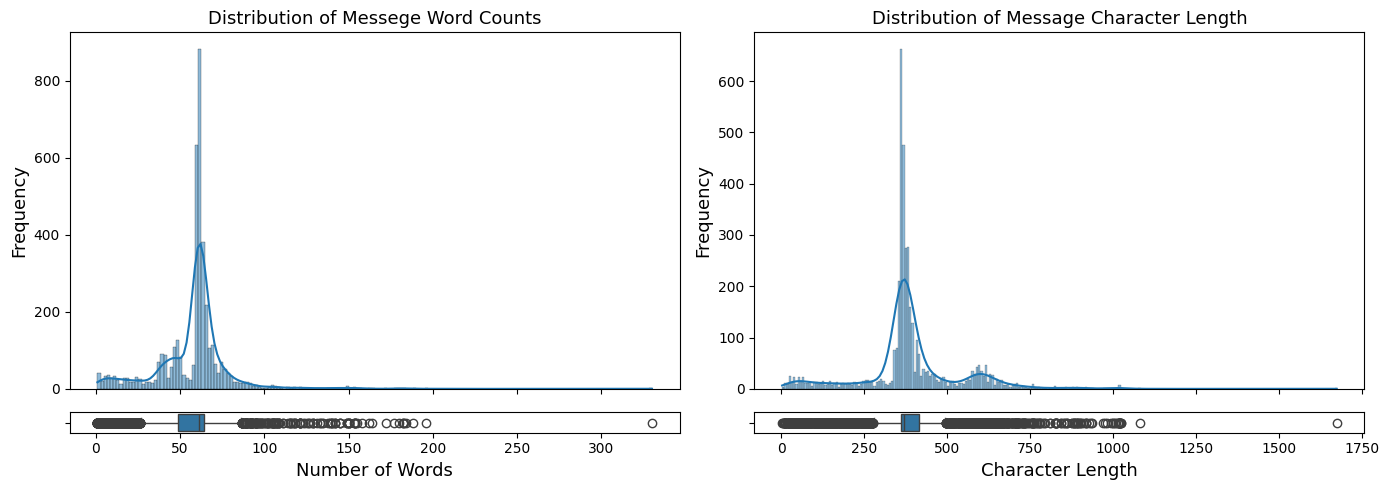

In [16]:
# Plots histograms and boxplots for word count and message length distributions.
generate_hist_box_plots(
    df,
    plot_data=[
        {
            "column": "word_count",
            "label": "Number of Words",
            "title": "Distribution of Messege Word Counts",
        },
        {
            "column": "message_length",
            "label": "Character Length",
            "title": "Distribution of Message Character Length",
        },
    ],
)

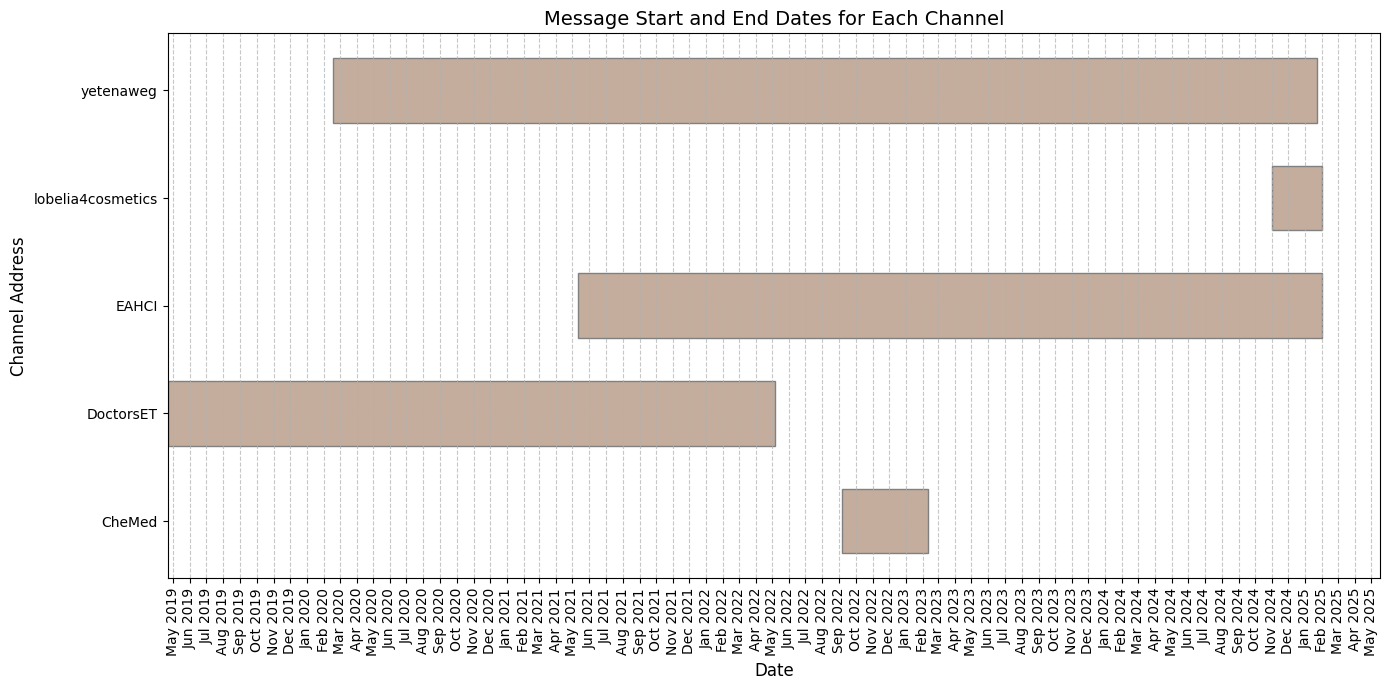

In [17]:
# Plot Gantt chart of message dates for each channel
plot_gantt_chart(df)

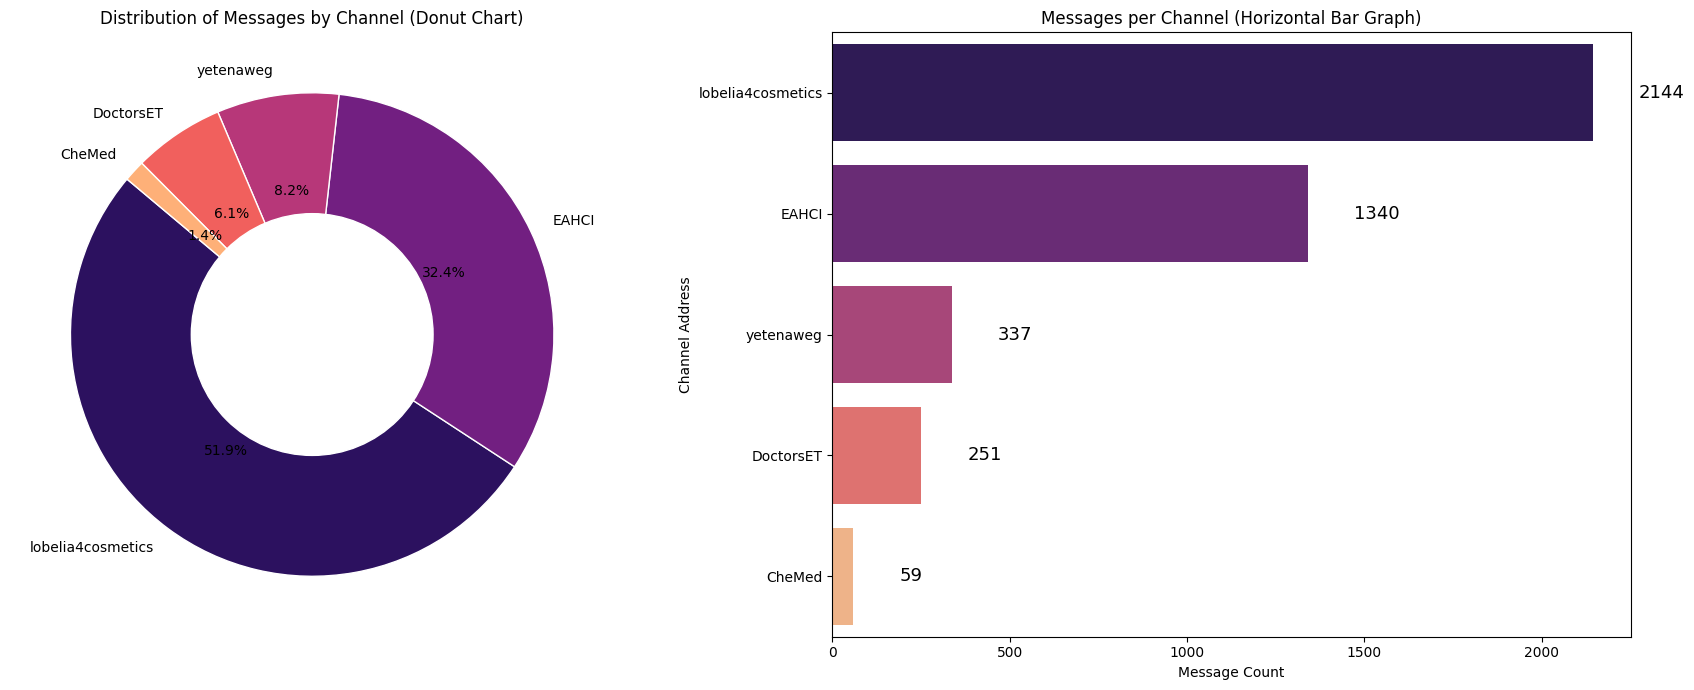

In [18]:
# Plots message distribution by channel.
plot_channel_distribution(df)

- **Top Channels:** @forfreemarket leads with 5,357 messages, while @kuruwear has the fewest at 231, indicating a significant disparity in channel activity.  
- **Channel Concentration:** The top 5 channels account for over 22,000 messages, suggesting a high concentration of activity in a few channels.  
- **Lower Engagement:** Channels like @belaclassic and @kuruwear show relatively low engagement, potentially reflecting niche audiences or limited reach.

### Word Cloud Visualizations

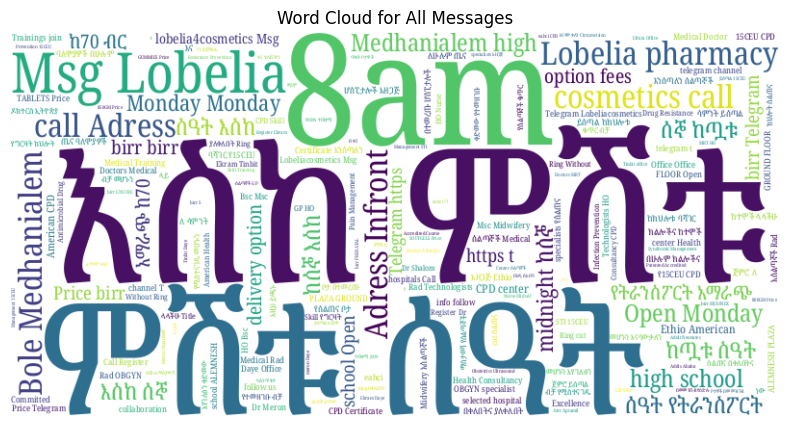

In [19]:
# Plot word cloud for all text (default)
plot_word_cloud(df)